In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import os

df = pd.read_csv (r'./dataset/concatenated.csv')
print (df)


      Unnamed: 0       ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0              0  5008804            1             1                1   
1              1  5008805            1             1                1   
2             16  5008823            1             1                1   
3             18  5008825            0             1                0   
4             19  5008826            0             1                0   
...          ...      ...          ...           ...              ...   
8573       36448  5149828            1             1                1   
8574       36449  5149834            0             0                1   
8575       36450  5149838            0             0                1   
8576       36451  5150049            0             0                1   
8577       36452  5150337            1             0                1   

      AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
0             427500.0                 4                  

TypeError: argument of type 'method' is not iterable

In [2]:
df.describe(include='all')

Unnamed: 0            ID  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
count   8578.000000  8.578000e+03  8578.000000   8578.000000      8578.000000   
mean   19018.267428  5.079033e+06     0.340639      0.369783         0.652833   
std    10830.649587  4.186688e+04     0.473952      0.482774         0.476097   
min        0.000000  5.008804e+06     0.000000      0.000000         0.000000   
25%     9663.000000  5.044489e+06     0.000000      0.000000         0.000000   
50%    19000.500000  5.078897e+06     0.000000      0.000000         1.000000   
75%    28510.750000  5.115682e+06     1.000000      1.000000         1.000000   
max    36452.000000  5.150473e+06     1.000000      1.000000         1.000000   

       AMT_INCOME_TOTAL  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  \
count      8.578000e+03       8578.000000          8578.000000   
mean       1.900411e+05          2.376894             3.075309   
std        1.083330e+05          1.743641             1.347137   
min        2.700000e+04          0.000000             0.000000   
25%        1.215000e+05          1.000000             1.000000   
50%        1.620000e+05          4.000000             4.000000   
75%        2.250000e+05          4.000000             4.000000   
max        1.575000e+06          4.000000             4.000000   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  FLAG_WORK_PHONE   FLAG_PHONE  \
count         8578.000000        8578.000000      8578.000000  8578.000000   
mean             1.369667           1.298671         0.223129     0.291560   
std              0.957703           0.972443         0.416368     0.454507   
min              0.000000           0.000000         0.000000     0.000000   
25%              1.000000           1.000000         0.000000     0.000000   
50%              1.000000           1.000000         0.000000     0.000000   
75%              1.000000           1.000000         0.000000     1.000000   
max              4.000000           5.000000         1.000000     1.000000   

        FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS          AGE  \
count  8578.000000      8578.000000      8578.000000  8578.000000   
mean      0.098624         9.131732         2.193985    43.230821   
std       0.298174         4.316703         0.909397    11.557326   
min       0.000000         0.000000         1.000000    21.095573   
25%       0.000000         6.000000         2.000000    33.434636   
50%       0.000000        10.000000         2.000000    41.887239   
75%       0.000000        12.000000         3.000000    52.567815   
max       1.000000        18.000000         9.000000    68.863837   

       YEARS_EMPLOYED       STATUS  MONTHS_BALANCE  
count     8578.000000  8578.000000     8578.000000  
mean         5.956858     0.500000       27.503730  
std          6.437980     0.500029       16.152042  
min          0.000000     0.000000        0.000000  
25%          1.137600     0.000000       14.000000  
50%          4.178046     0.500000       26.000000  
75%          8.512153     1.000000       40.000000  
max         42.878362     1.000000       60.000000

In [3]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
profile.to_file("Analysis.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:xlabel='STATUS', ylabel='AMT_INCOME_TOTAL'>

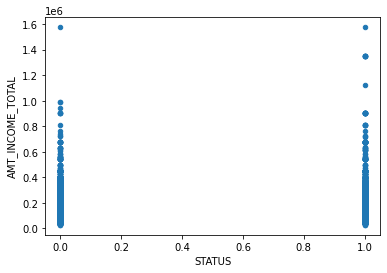

In [5]:
# in our data, status of 0 is "ACCEPT" (no late payments) and status of 1 is "DON'T ACCEPT" (late payments)
# Expecting a negative correlation, for example, between status and income (higher income-> more status 0, lower
# income -> more status 1)
# This isn't evident in this graph - maybe need to visualize it a different way, or drop more of the "accept"/status = 0 rows
# since the data is so skewed?
%matplotlib inline

df.plot.scatter('STATUS','AMT_INCOME_TOTAL')

      STATUS  AMT_INCOME_TOTAL
0          1          427500.0
1          1          427500.0
2          0          135000.0
3          1          130500.0
4          1          130500.0
...      ...               ...
8573       1          315000.0
8574       1          157500.0
8575       1          157500.0
8576       1          283500.0
8577       1          112500.0

[8578 rows x 2 columns]


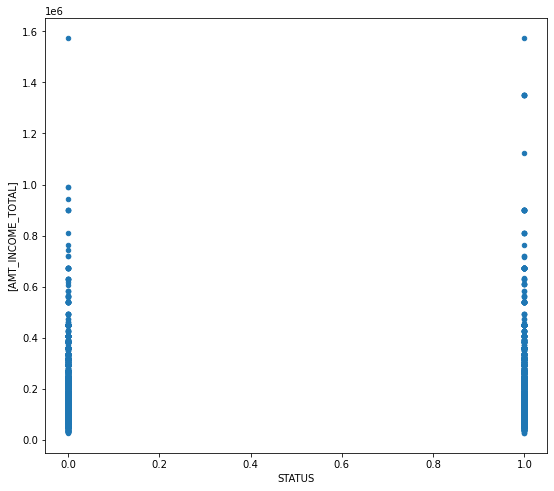

In [7]:
# take data
# data = pd.read_csv("./dataset/concatenated.csv")

df1 = pd.DataFrame(data, columns=["STATUS", "AMT_INCOME_TOTAL"])
print(df1)

# plot the dataframe
df1.plot(x="STATUS", y=["AMT_INCOME_TOTAL"], kind="scatter", figsize=(9, 8))

# print graph
plt.show()

#save graph
# plt.savefig("income_vs_status.png")



      STATUS  CNT_FAM_MEMBERS
2          0                2
8          0                3
9          0                3
10         0                4
11         0                4
...      ...              ...
8216       0                4
8218       0                1
8220       0                1
8224       0                3
8225       0                2

[4289 rows x 2 columns]
   CNT_FAM_MEMBERS  counts
0                1     856
1                2    2303
2                3     735
3                4     334
4                5      52
5                6       6
6                7       3


Text(0, 0.5, '# of respondents')

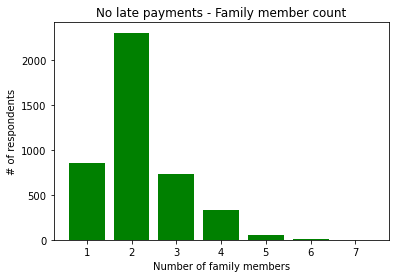

In [8]:
df2 = pd.DataFrame(data, columns=["STATUS", "CNT_FAM_MEMBERS"])
# df2 = pd.DataFrame({'STATUS': status,
                   # 'CNT_FAM_MEMBERS': CNT_FAM_MEMBERS}, index=index)
# df2=(df2[:30000])

# plot all the customers without any late payments
df_no_late_payments = df2.loc[df['STATUS'] == 0]
print(df_no_late_payments)


df_familycount_status0 = df_no_late_payments.groupby(['CNT_FAM_MEMBERS']).size().reset_index(name='counts')
print(df_familycount_status0)


X = list(df_familycount_status0.iloc[:, 0])
Y = list(df_familycount_status0.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("No late payments - Family member count")
plt.xlabel("Number of family members")
plt.ylabel("# of respondents")

      STATUS  CNT_FAM_MEMBERS
0          1                2
1          1                2
3          1                2
4          1                2
5          1                2
...      ...              ...
8573       1                2
8574       1                2
8575       1                2
8576       1                2
8577       1                1

[4289 rows x 2 columns]
   CNT_FAM_MEMBERS  counts
0                1     825
1                2    2263
2                3     723
3                4     423
4                5      48
5                6       5
6                9       2


Text(0, 0.5, '# of respondents')

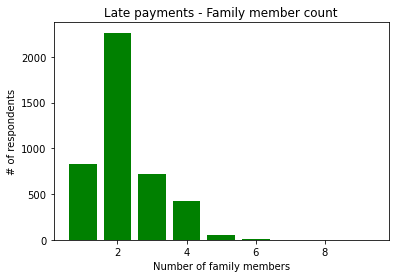

In [9]:
# expecting that late payments/"do not acccepts" will have more family members on average - doesn't look this way according to graphs
# but maybe the data is too skewed (most of data points have no late payments)

# plot all the customers WITH late payments
df_late_payments = df2.loc[df['STATUS'] == 1]
print(df_late_payments)


df_familycount_status1 = df_late_payments.groupby(['CNT_FAM_MEMBERS']).size().reset_index(name='counts')
print(df_familycount_status1)


X = list(df_familycount_status1.iloc[:, 0])
Y = list(df_familycount_status1.iloc[:, 1])
  
# Plot the data using bar() method
plt.bar(X, Y, color='g')
plt.title("Late payments - Family member count")
plt.xlabel("Number of family members")
plt.ylabel("# of respondents")
  
